In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
print(cv2.__version__)

4.5.1-dev


In [2]:
mat = np.zeros((3000, 3000, 3))

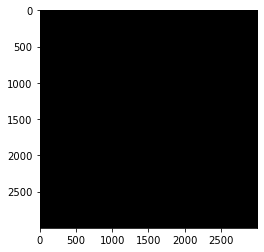

In [3]:
plt.imshow(mat)
plt.show()

In [4]:
## height代表雷达安装的高度， angle代表雷达水平中线的俯视角
def laser_range(height, angle):
    mat = np.zeros((3000, 3000, 3))
    max_dist = 0
    min_dist = 300.0
    dist = 0
    dist_prev = 0
    dist_list = []
    num_points = 0
    for h in range(600):
        h_angle = np.deg2rad(30.0 + 0.2 * h)
        for v in range(125):
            v_angle = np.deg2rad(angle - 12.5 + 0.2 * v)
            dist = height / np.tan(v_angle)
            if dist > max_dist:
                max_dist = dist
            if dist < min_dist:
                min_dist = dist
            if dist < 100:
                num_points += 1
            x = 1500 + int(10 * np.cos(h_angle) * dist)
            y = 2999 - int(10 * np.sin(h_angle) * dist)
            if x >=0 and y >=0 and x <=2999 and y <=2999:
                cv2.circle(mat, (x,y), 6, (255,255,255), -1)
            if h == 0 and dist_prev != 0:
                dist_list.append(round(dist_prev - dist, 2))
            dist_prev = dist
    print("最大检测距离为{}米,最小距离为{}米。".format(max_dist, min_dist))
    print("落在100米以内范围的点共{}个，比例为{}%。".format(num_points, float(num_points)/750))
    plt.imshow(mat)
    plt.show()
    print("行间距离为：", dist_list)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


最大检测距离为183.2301243874496米,最小距离为15.499716050596763米。
落在100米以内范围的点共68400个，比例为91.2%。


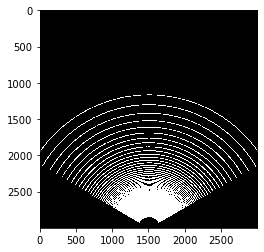

行间距离为： [13.59, 11.72, 10.21, 8.97, 7.95, 7.09, 6.36, 5.74, 5.21, 4.75, 4.34, 3.99, 3.68, 3.4, 3.15, 2.93, 2.74, 2.56, 2.39, 2.25, 2.11, 1.99, 1.88, 1.78, 1.68, 1.6, 1.52, 1.44, 1.37, 1.31, 1.25, 1.19, 1.14, 1.09, 1.05, 1.0, 0.96, 0.93, 0.89, 0.86, 0.83, 0.8, 0.77, 0.74, 0.71, 0.69, 0.67, 0.65, 0.63, 0.61, 0.59, 0.57, 0.55, 0.54, 0.52, 0.51, 0.49, 0.48, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.33, 0.32, 0.31, 0.31, 0.3, 0.29, 0.29, 0.28, 0.27, 0.27, 0.26, 0.26, 0.25, 0.25, 0.24, 0.24, 0.23, 0.23, 0.23, 0.22, 0.22, 0.21, 0.21, 0.21, 0.2, 0.2, 0.2, 0.19, 0.19, 0.19, 0.18, 0.18, 0.18, 0.17, 0.17, 0.17, 0.17, 0.16, 0.16, 0.16, 0.16, 0.15, 0.15, 0.15, 0.15, 0.15, 0.14, 0.14, 0.14, 0.14, 0.14, 0.13]


In [5]:
laser_range(8.0, 15.0)

In [6]:
## height代表雷达安装的高度（单位厘米）， angle代表雷达水平中线的俯视角（角度制）
def plane_laser_range(height, angle):
    mat = np.zeros((1000, 2500, 3))
    max_dist = 0
    min_dist = 300.0
    dist = 0
    dist_prev = 0
    dist_list = []
    diff_list = []
    num_points = 0
    for v in range(125):
        v_angle = np.deg2rad(angle - 12.5 + 0.2 * v)
        dist = height / np.tan(v_angle)
        hyp = height / np.sin(v_angle)
        if dist > max_dist:
            max_dist = dist
        if dist < min_dist:
            min_dist = dist
        y = round(dist)
        for h in range(600):
            if dist < 1000:
                num_points += 1
            h_angle = np.deg2rad(60 - 0.2 * h)
            x = 1250  + hyp * np.tan(h_angle) 
            if x >=0 and y >=0 and x <=4999 and y <=2999:
                cv2.circle(mat, (round(x),round(y)), 3, (255,255,255), -1)
        if dist_prev != 0:
            dist_list.append(round(dist_prev - dist, 2))
        dist_prev = dist
        diff_list.append(round(hyp * np.tan(np.pi/3) *2 , 2))
    cutoff = round(height / (height - 60.0) * 80.0)
    for x in range(2500):
        cv2.circle(mat, (x, cutoff), 3, (255,0,0), -1)
    print("最大检测距离为{}厘米,最小距离为{}厘米。".format(max_dist, min_dist))
    #print("落在1000厘米以内范围的点共{}个，比例为{}%。".format(num_points, float(num_points)/750))
    print("盲区宽度：{}厘米".format(min_dist - 60.0))
    plt.title("Lidar Scanning Range Visualization")
    plt.xlabel("Vertical Forward Distance(cm)")
    plt.ylabel("Horizontal Distance(cm)")
    plt.ylim(0, 999)
    plt.imshow(mat)
    plt.show()
    print("行间距离为（cm）：", dist_list)
    print("\n")
    print("行宽为(cm)：", diff_list)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


最大检测距离为28647.86066771398厘米,最小距离为-28647.86066771449厘米。
盲区宽度：-28707.86066771449厘米


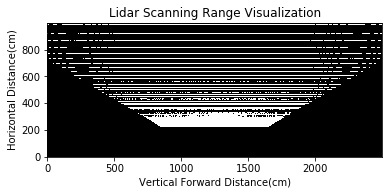

行间距离为（cm）： [3.79, 3.91, 4.04, 4.17, 4.32, 4.47, 4.63, 4.79, 4.97, 5.16, 5.36, 5.57, 5.79, 6.02, 6.28, 6.54, 6.83, 7.13, 7.46, 7.81, 8.18, 8.58, 9.01, 9.48, 9.98, 10.52, 11.11, 11.75, 12.45, 13.21, 14.05, 14.97, 15.98, 17.1, 18.33, 19.71, 21.26, 22.99, 24.94, 27.15, 29.67, 32.56, 35.89, 39.76, 44.3, 49.66, 56.07, 63.79, 73.23, 84.94, 99.7, 118.68, 143.66, 177.44, 224.75, 293.88, 400.73, 578.8, 909.51, 1637.08, 3819.78, 19098.65, -57295.72, 19098.65, 3819.78, 1637.08, 909.51, 578.8, 400.73, 293.88, 224.75, 177.44, 143.66, 118.68, 99.7, 84.94, 73.23, 63.79, 56.07, 49.66, 44.3, 39.76, 35.89, 32.56, 29.67, 27.15, 24.94, 22.99, 21.26, 19.71, 18.33, 17.1, 15.98, 14.97, 14.05, 13.21, 12.45, 11.75, 11.11, 10.52, 9.98, 9.48, 9.01, 8.58, 8.18, 7.81, 7.46, 7.13, 6.83, 6.54, 6.28, 6.02, 5.79, 5.57, 5.36, 5.16, 4.97, 4.79, 4.63, 4.47, 4.32, 4.17, 4.04, 3.91]


行宽为(cm)： [-800.25, -813.05, -826.29, -839.97, -854.12, -868.77, -883.94, -899.66, -915.97, -932.88, -950.45, -968.7, -987.67, -1007.42, -1027

In [8]:
plane_laser_range(50.0, 0.0)

In [8]:
## height代表雷达安装的高度， angle代表雷达水平中线的俯视角
def vplane_laser_range(height, angle):
    mat = np.zeros((3000, 5000, 3))
    max_dist = 0
    min_dist = 300.0
    dist = 0
    dist_prev = 0
    dist_list = []
    diff_list = []
    num_points = 0
    for v in range(600):
        v_angle = np.deg2rad(angle - 60 + 0.2 * v)
        if v_angle < 0.01:
            pass
        dist = height / np.tan(v_angle)
        hyp = height / np.sin(v_angle)
        if dist > max_dist:
            max_dist = dist
        if dist < min_dist:
            min_dist = dist
        y = 2999 - round(dist * 10, 0)
        for h in range(125):
            if dist < 100:
                num_points += 1
            h_angle = np.deg2rad(12.5 - 0.2 * h)
            x = 2500  + 10 * hyp * np.tan(h_angle) 
            if x >=0 and y >=0 and x <=4999 and y <=2999:
                cv2.circle(mat, (round(x),round(y)), 6, (255,255,255), -1)
        if dist_prev != 0:
            dist_list.append(round(dist_prev - dist, 2))
        dist_prev = dist
    print("最大检测距离为{}米,最小距离为{}米。".format(max_dist, min_dist))
    print("落在100米以内范围的点共{}个，比例为{}%。".format(num_points, float(num_points)/750))
    plt.imshow(mat)
    plt.show()
    print("行间距离为：", dist_list)

<ipython-input-8-af4dcec24ef3>:15: RuntimeWarning: divide by zero encountered in double_scalars
  dist = height / np.tan(v_angle)
<ipython-input-8-af4dcec24ef3>:16: RuntimeWarning: divide by zero encountered in double_scalars
  hyp = height / np.sin(v_angle)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


最大检测距离为inf米,最小距离为-802.1376552325861米。
落在100米以内范围的点共73875个，比例为98.5%。


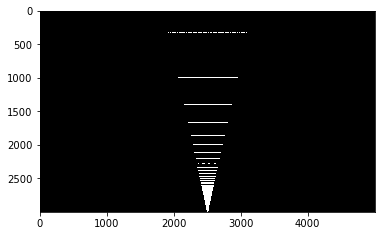

行间距离为： [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.15, 0.15, 0.16, 0.16, 0.16, 0.17, 0.17, 0.18, 0.18, 0.19, 0.2, 0.2, 0.21, 0.22, 0.22, 0.23, 0.2

In [9]:
vplane_laser_range(2.8, 15)

In [10]:
MAX_HEIGHT = 287.0
MIN_ANGLE = 25.0
N_ITER = 147

## height代表雷达安装的高度（单位厘米）， angle代表雷达水平中线的俯视角（角度制）
def plane_laser_range_selection():
    for i in range(N_ITER):
        height = MAX_HEIGHT - int(i / 7) * 7
        angle = MIN_ANGLE + (i % 7) * 5
        mat = np.zeros((1000, 2500, 3), dtype = np.uint8)
        max_dist = 0
        min_dist = 300.0
        dist = 0
        dist_prev = 0
        dist_list = []
        diff_list = []
        num_points = 0
        for v in range(125):
            v_angle = np.deg2rad(angle - 12.5 + 0.2 * v)
            dist = height / np.tan(v_angle)
            hyp = height / np.sin(v_angle)
            if dist > max_dist:
                max_dist = dist
            if dist < min_dist:
                min_dist = dist
            y = round(dist)
            for h in range(600):
                if dist < 1000:
                    num_points += 1
                h_angle = np.deg2rad(60 - 0.2 * h)
                x = 1250  + hyp * np.tan(h_angle) 
                if x >=0 and y >=0 and x <=4999 and y <=2999:
                    cv2.circle(mat, (round(x),round(y)), 1, (255,255,255), -1)
        cutoff = round(height / (height - 60.0) * 80.0)
        for x in range(2500):
            cv2.circle(mat, (x, cutoff), 3, (255,0,0), -1)
        plt.imshow(mat)
        plt.ylabel("({}, {})".format(height,angle))
        plt.xlabel("({}, {})".format(round(max_dist,2), round(min_dist,2)))
        plt.ylim(0,999)
        plt.show()

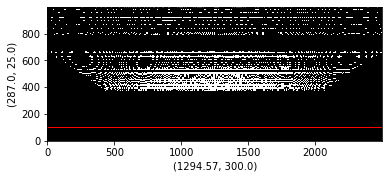

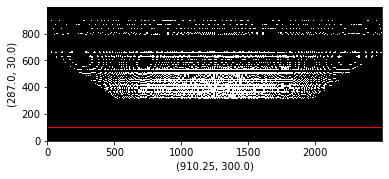

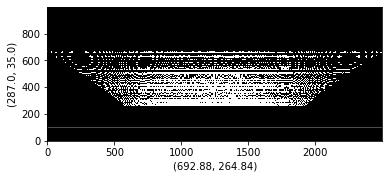

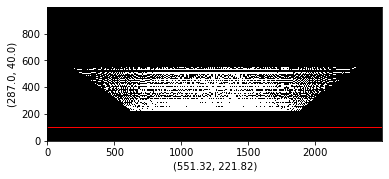

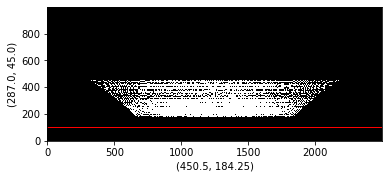

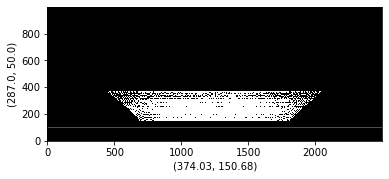

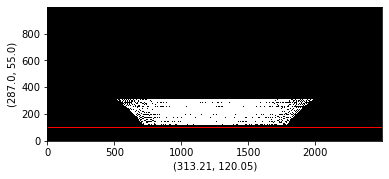

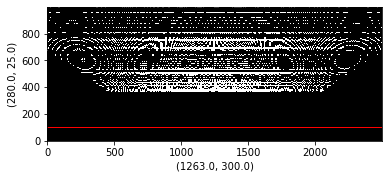

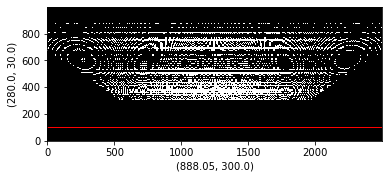

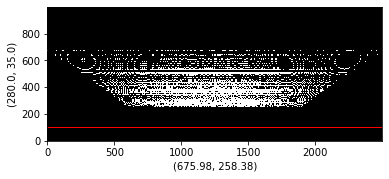

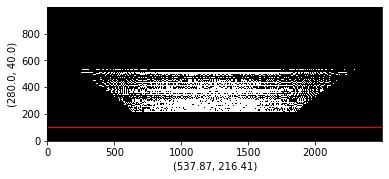

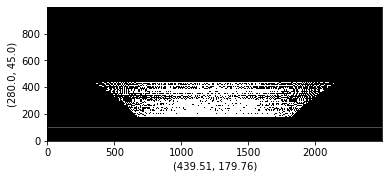

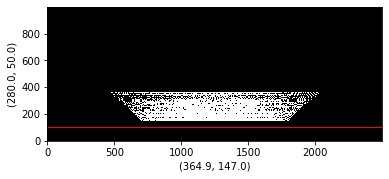

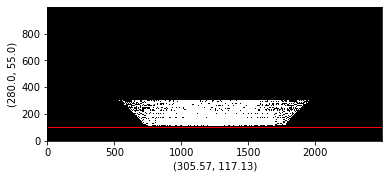

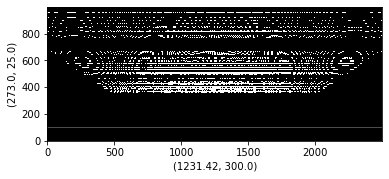

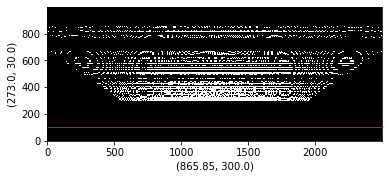

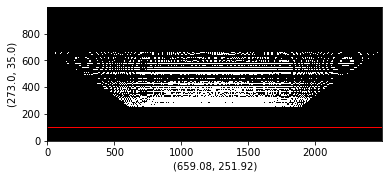

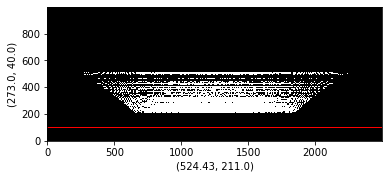

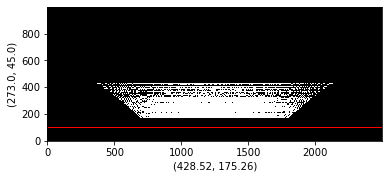

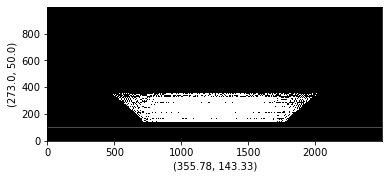

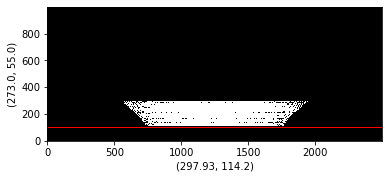

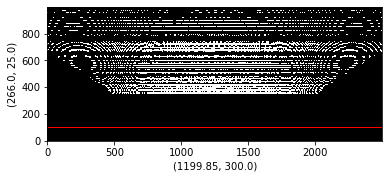

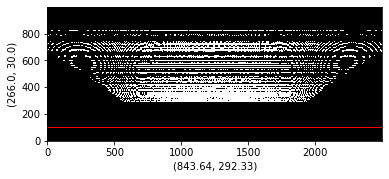

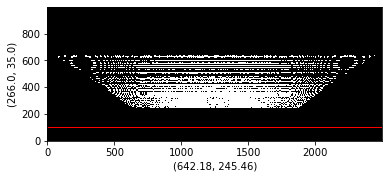

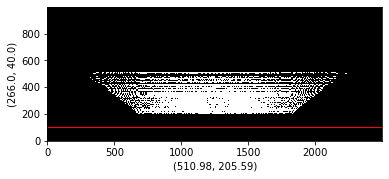

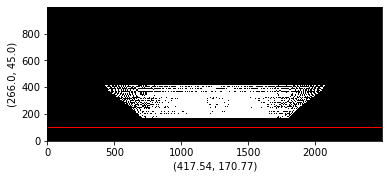

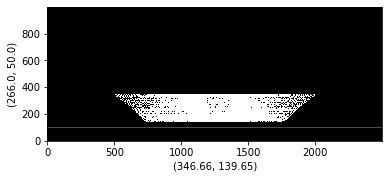

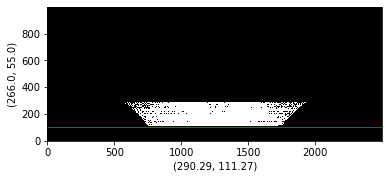

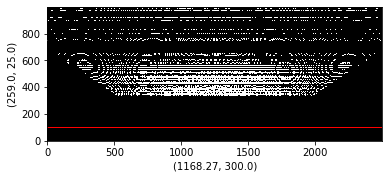

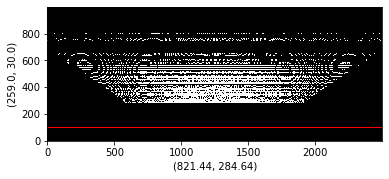

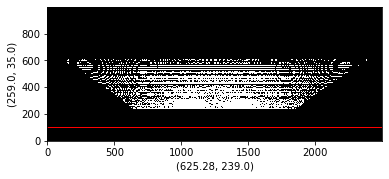

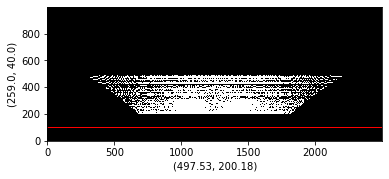

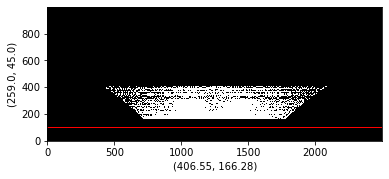

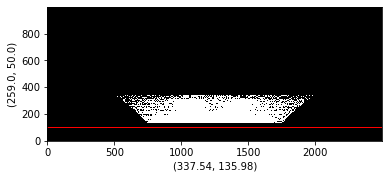

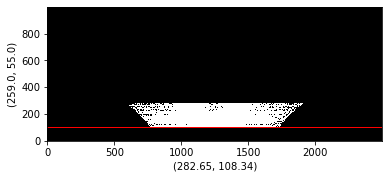

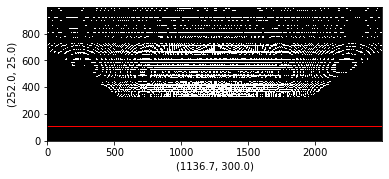

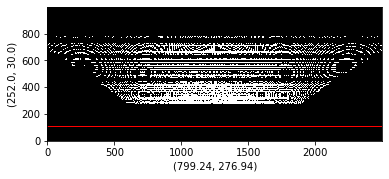

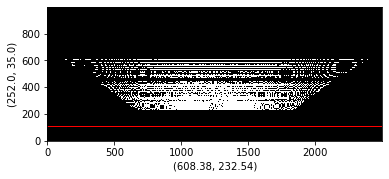

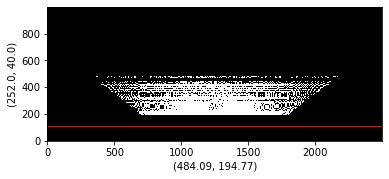

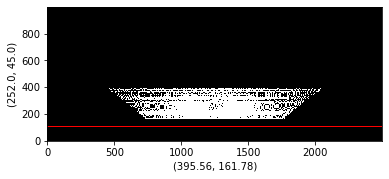

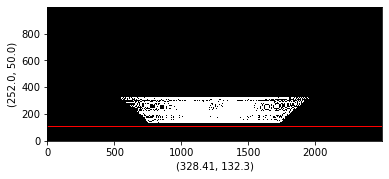

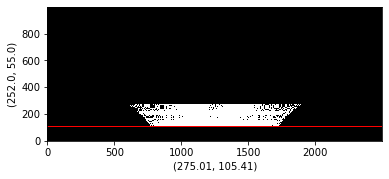

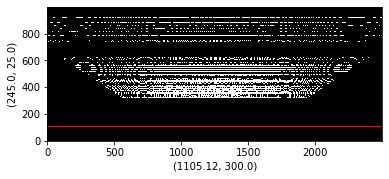

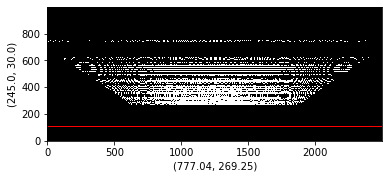

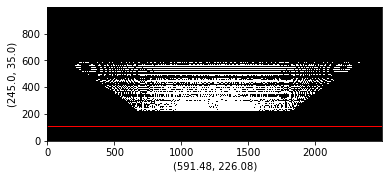

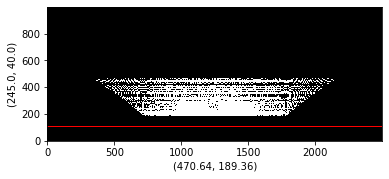

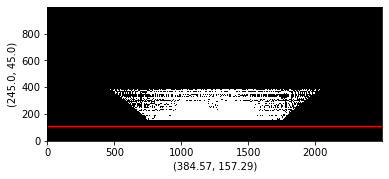

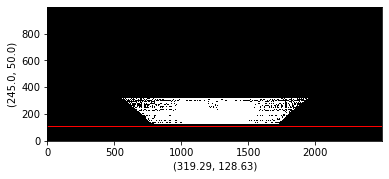

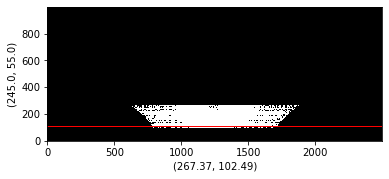

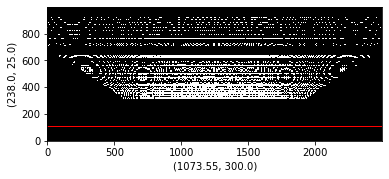

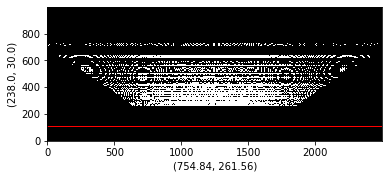

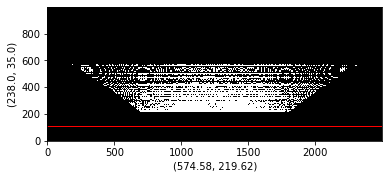

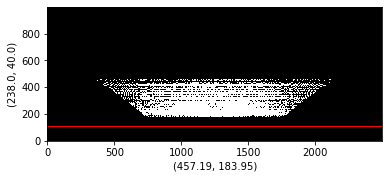

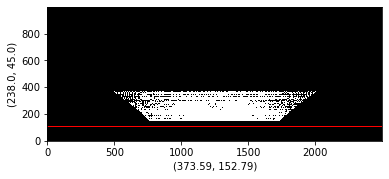

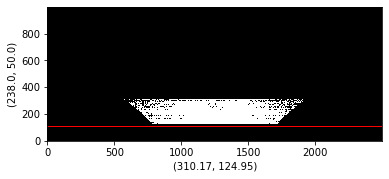

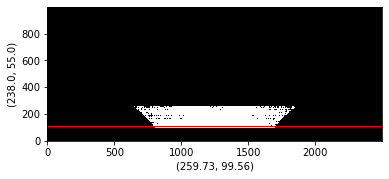

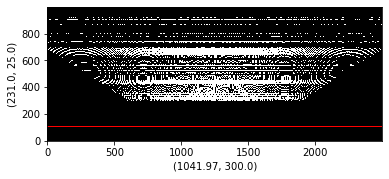

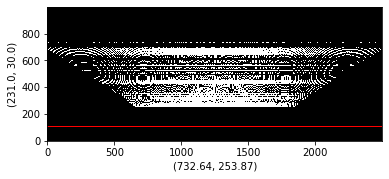

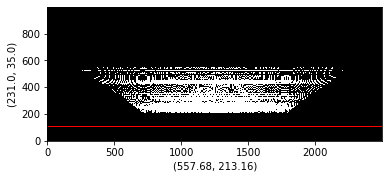

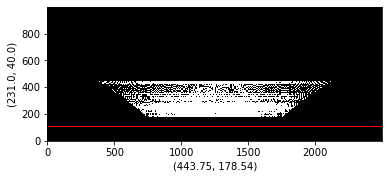

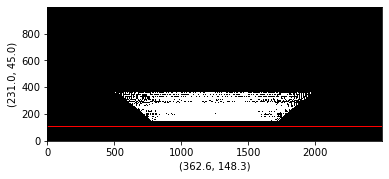

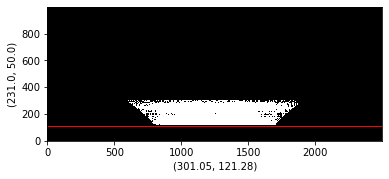

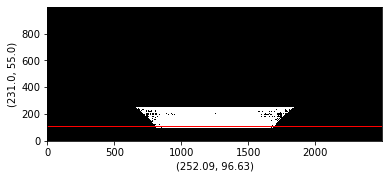

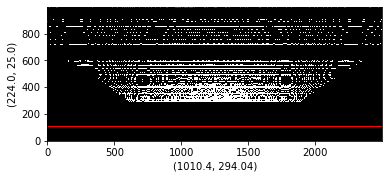

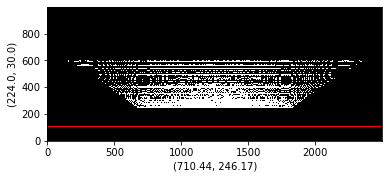

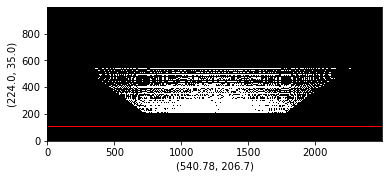

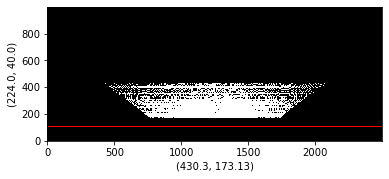

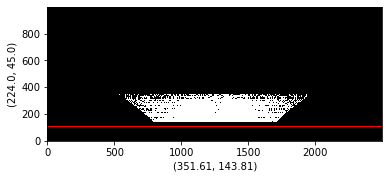

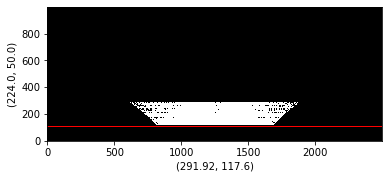

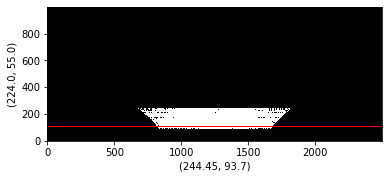

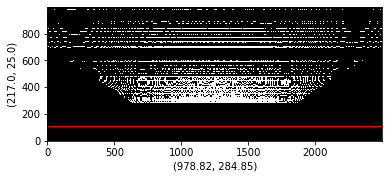

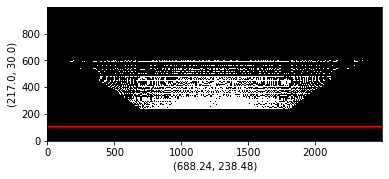

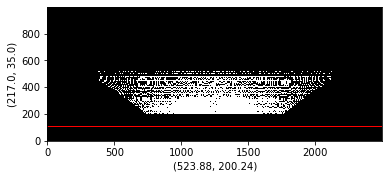

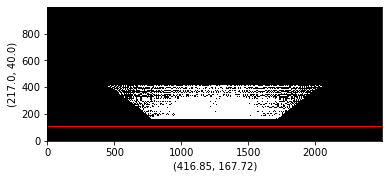

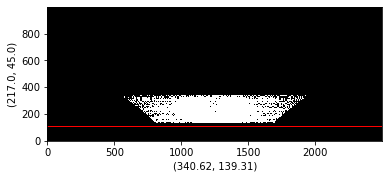

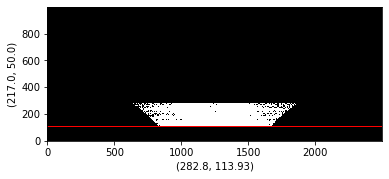

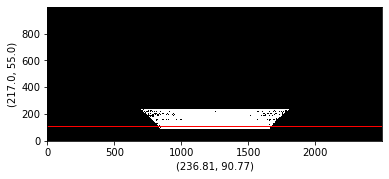

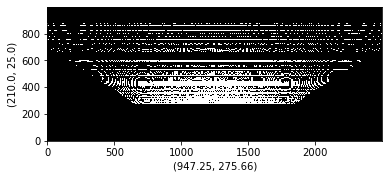

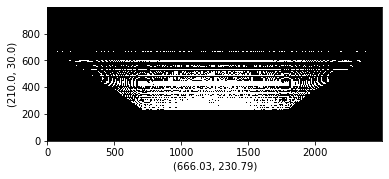

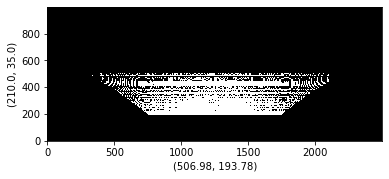

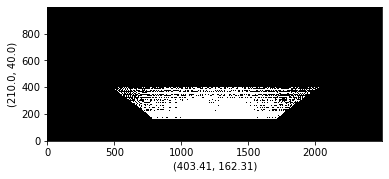

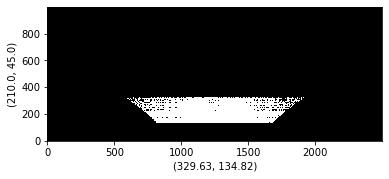

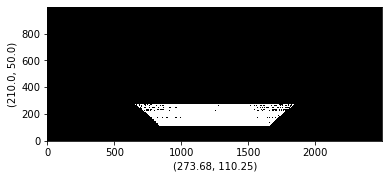

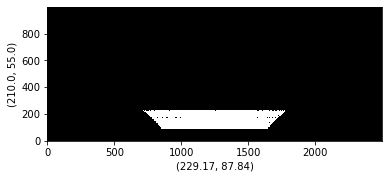

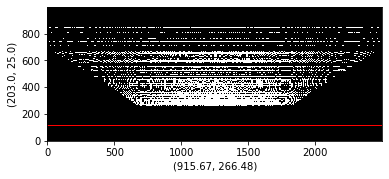

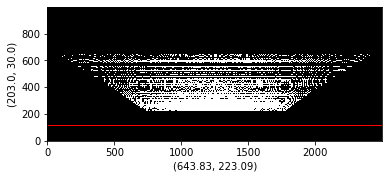

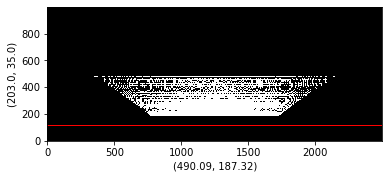

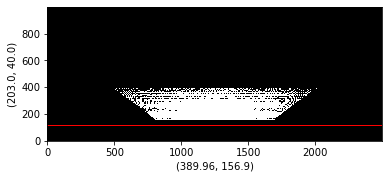

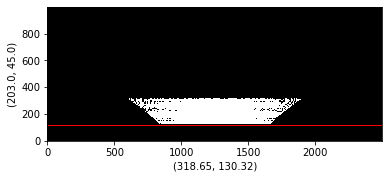

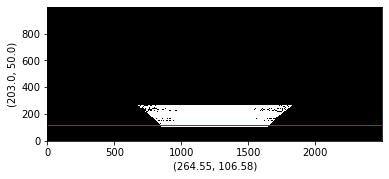

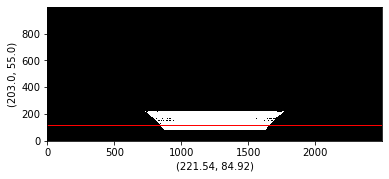

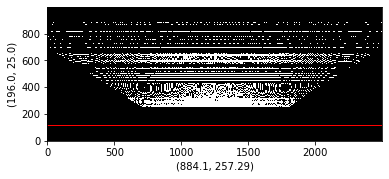

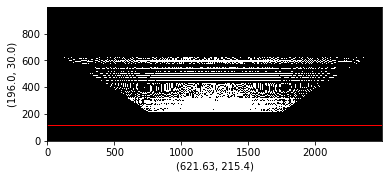

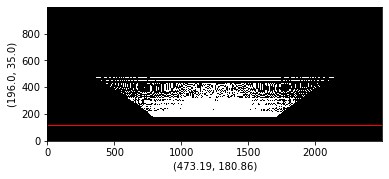

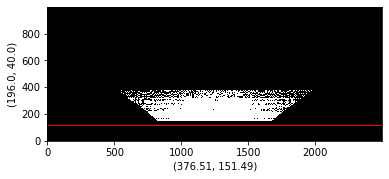

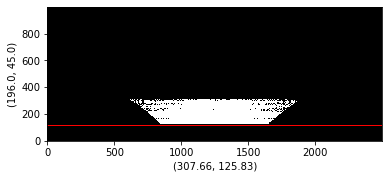

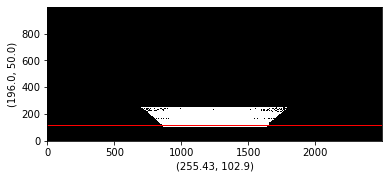

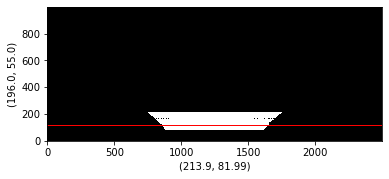

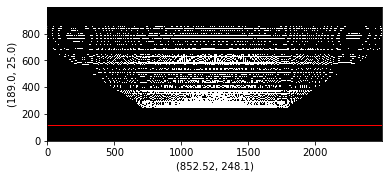

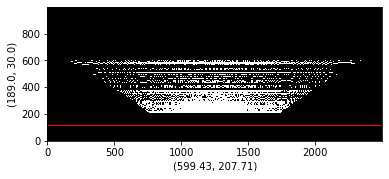

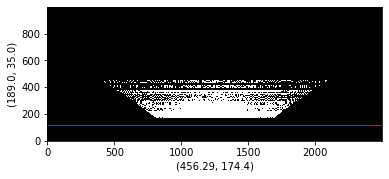

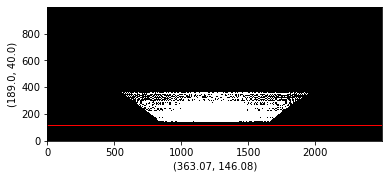

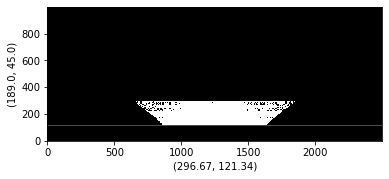

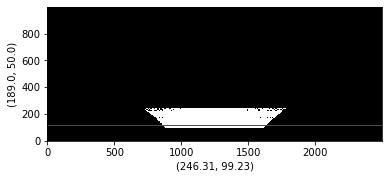

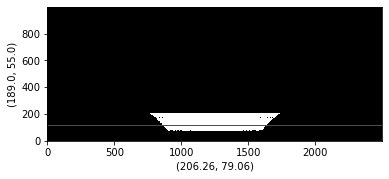

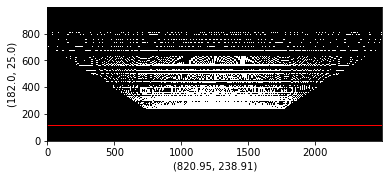

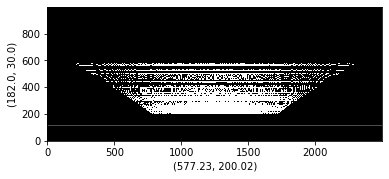

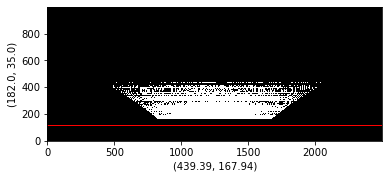

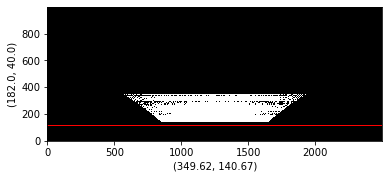

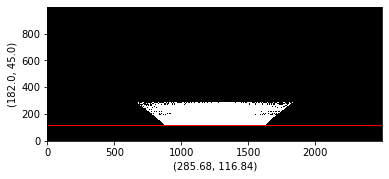

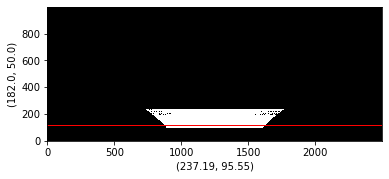

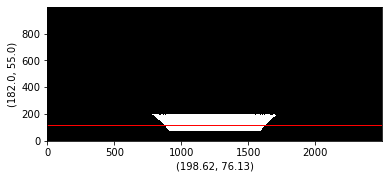

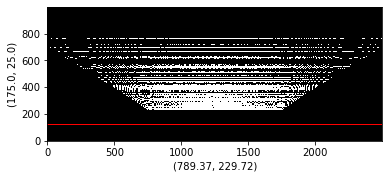

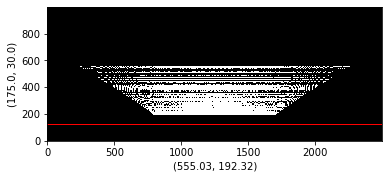

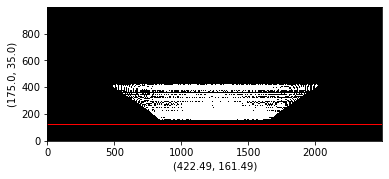

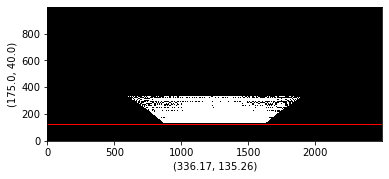

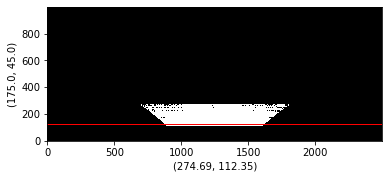

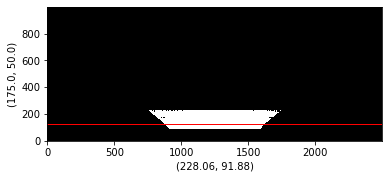

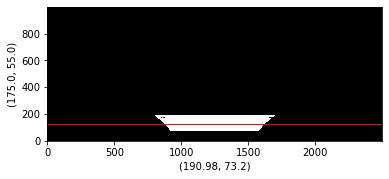

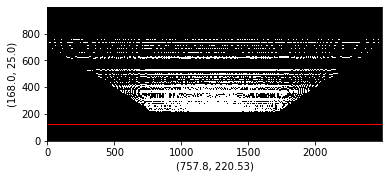

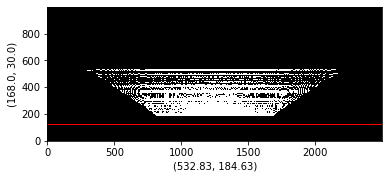

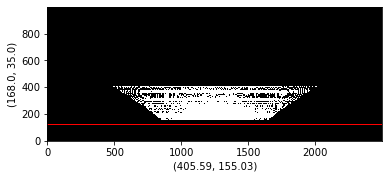

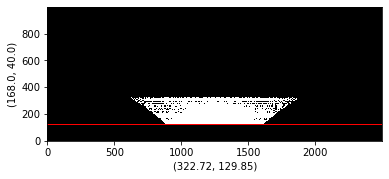

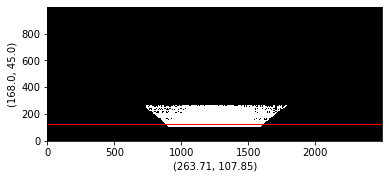

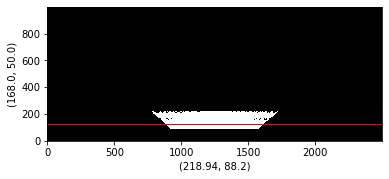

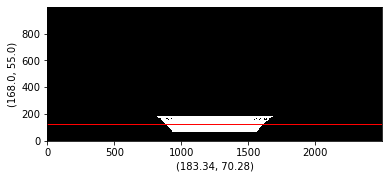

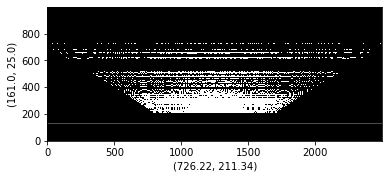

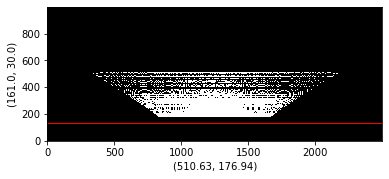

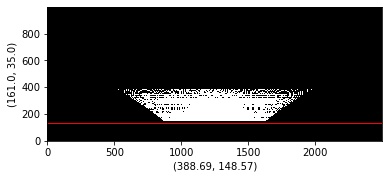

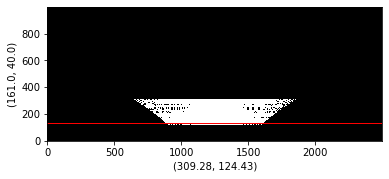

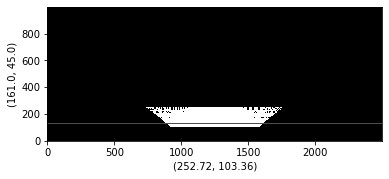

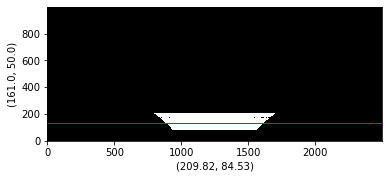

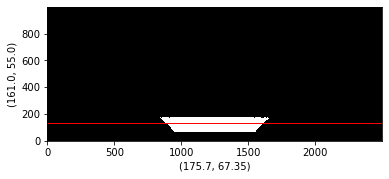

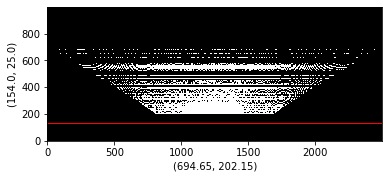

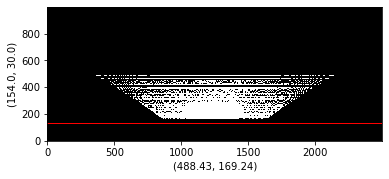

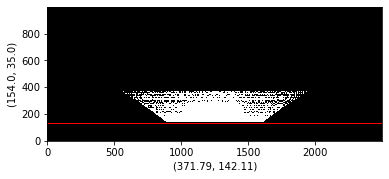

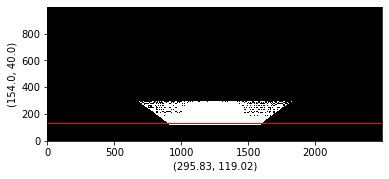

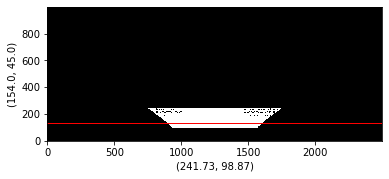

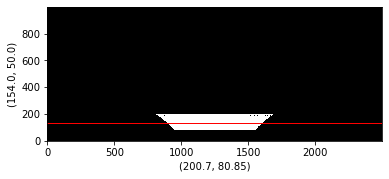

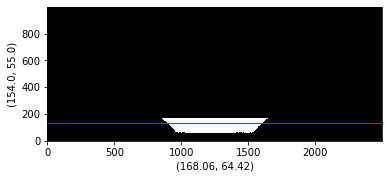

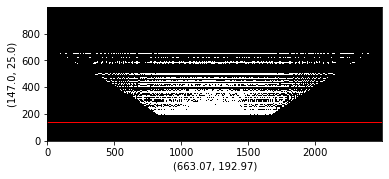

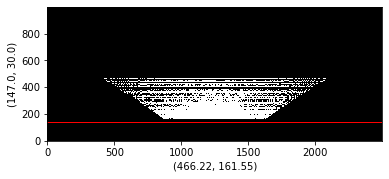

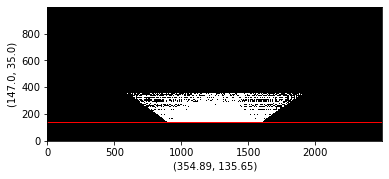

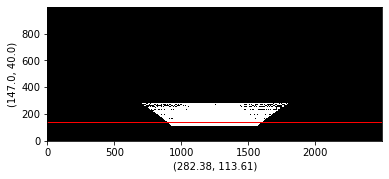

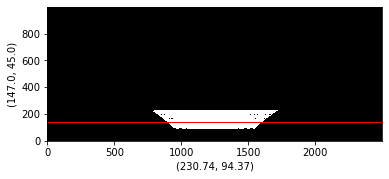

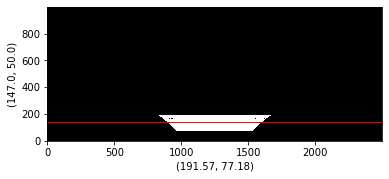

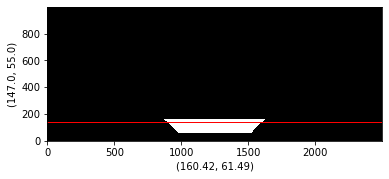

In [11]:
plane_laser_range_selection()

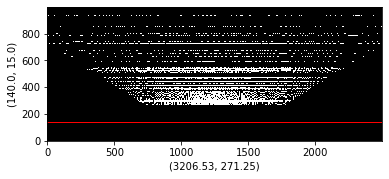

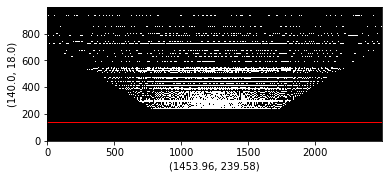

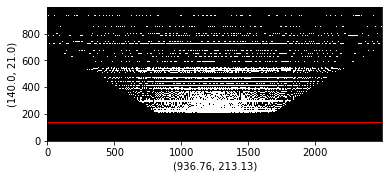

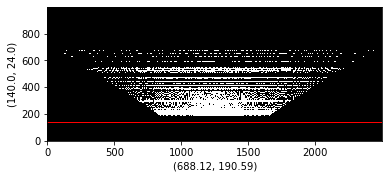

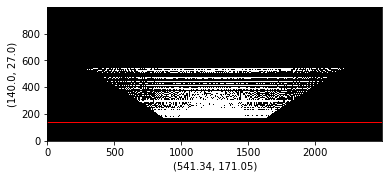

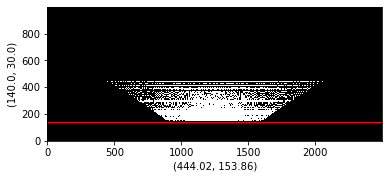

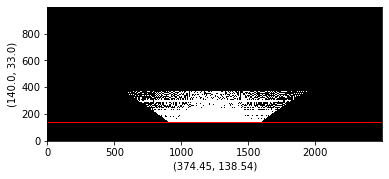

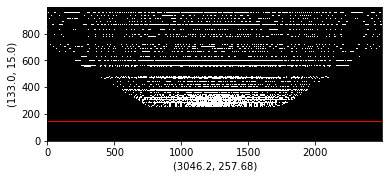

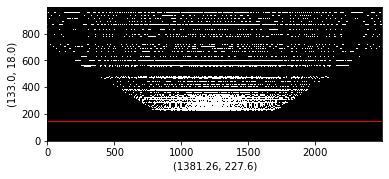

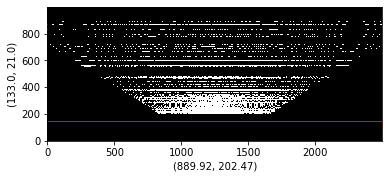

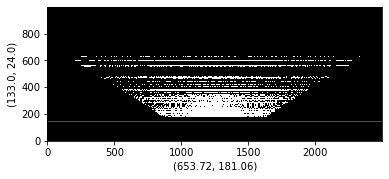

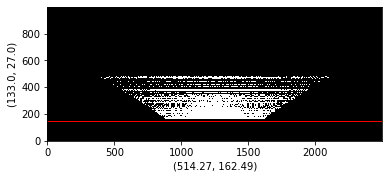

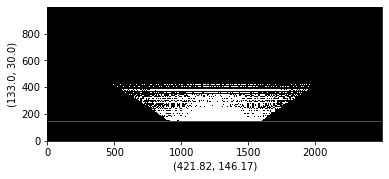

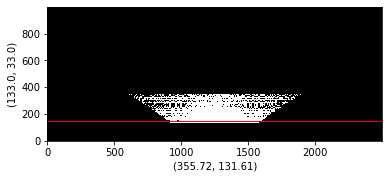

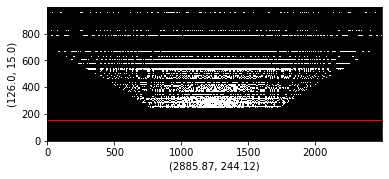

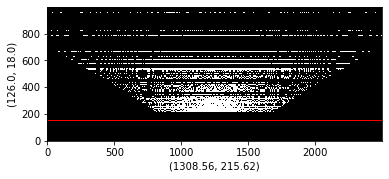

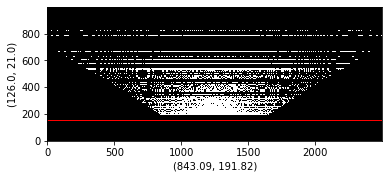

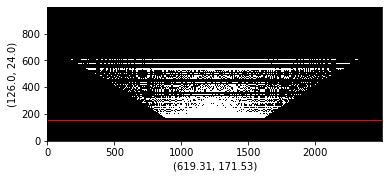

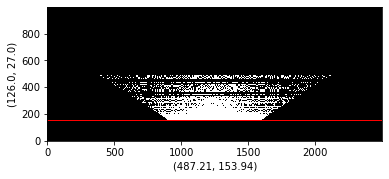

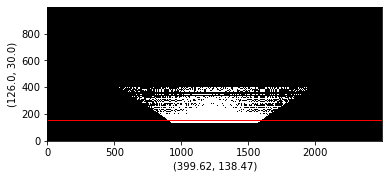

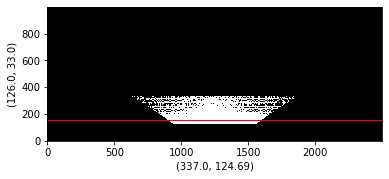

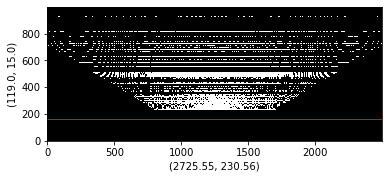

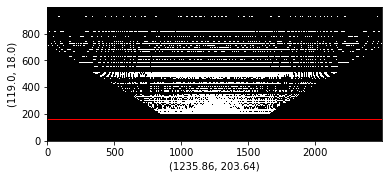

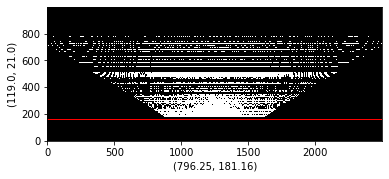

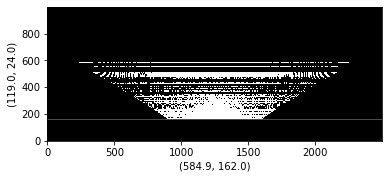

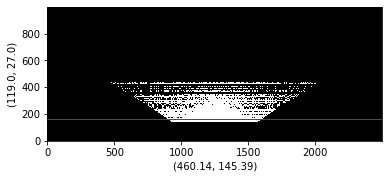

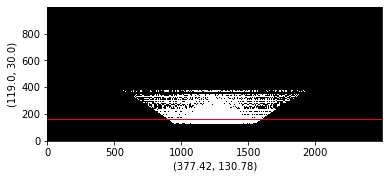

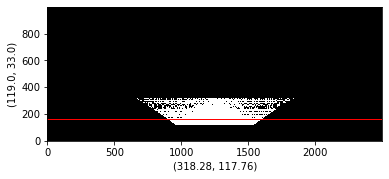

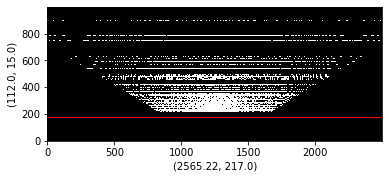

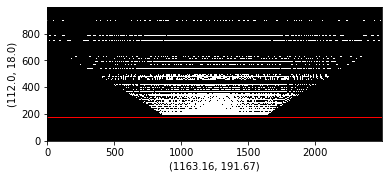

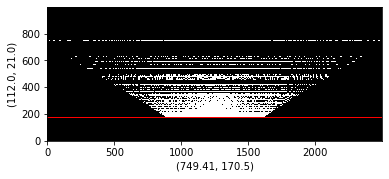

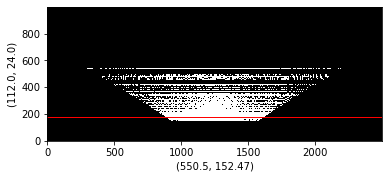

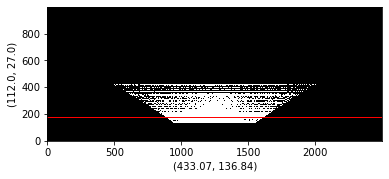

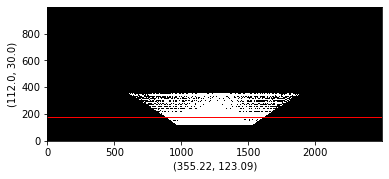

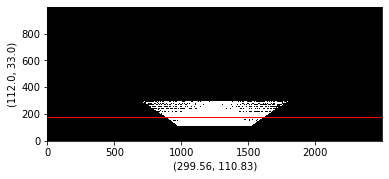

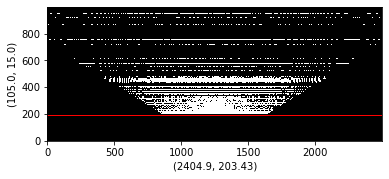

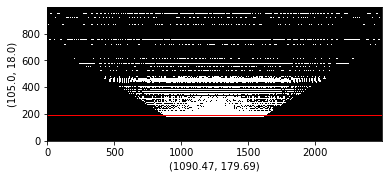

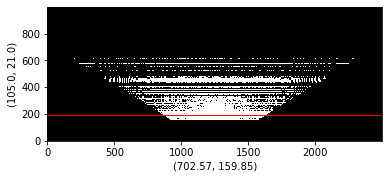

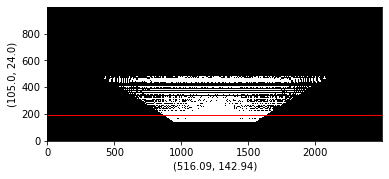

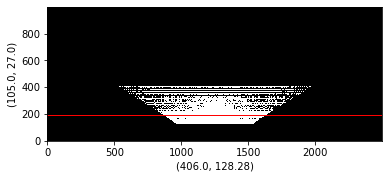

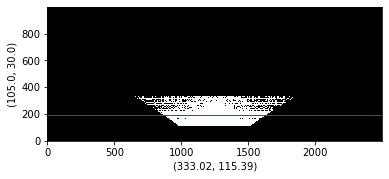

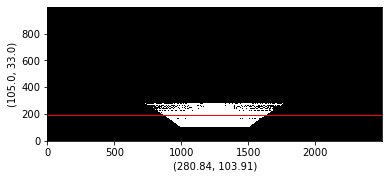

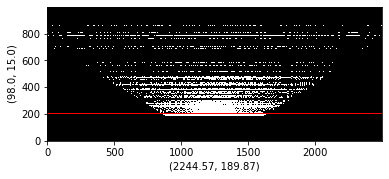

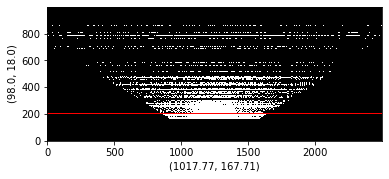

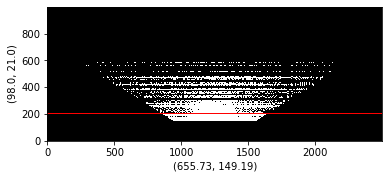

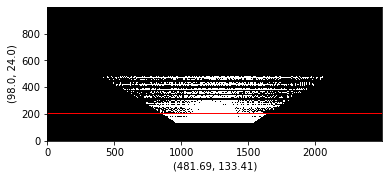

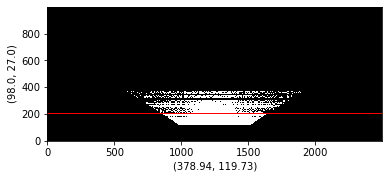

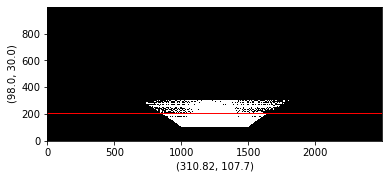

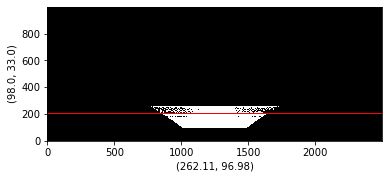

In [12]:
MAX_HEIGHT = 140.0
MIN_ANGLE = 15.0
N_ITER = 49

def plane_laser_range_selection2():
    for i in range(N_ITER):
        height = MAX_HEIGHT - int(i / 7) * 7
        angle = MIN_ANGLE + (i % 7) * 3
        mat = np.zeros((1000, 2500, 3), dtype = np.uint8)
        max_dist = 0
        min_dist = 300.0
        dist = 0
        dist_prev = 0
        dist_list = []
        diff_list = []
        num_points = 0
        for v in range(125):
            v_angle = np.deg2rad(angle - 12.5 + 0.2 * v)
            dist = height / np.tan(v_angle)
            hyp = height / np.sin(v_angle)
            if dist > max_dist:
                max_dist = dist
            if dist < min_dist:
                min_dist = dist
            y = round(dist)
            for h in range(600):
                if dist < 1000:
                    num_points += 1
                h_angle = np.deg2rad(60 - 0.2 * h)
                x = 1250  + hyp * np.tan(h_angle) 
                if x >=0 and y >=0 and x <=4999 and y <=2999:
                    cv2.circle(mat, (round(x),round(y)), 1, (255,255,255), -1)
        cutoff = round(height / (height - 60.0) * 80.0)
        for x in range(2500):
            cv2.circle(mat, (x, cutoff), 3, (255,0,0), -1)
        plt.imshow(mat)
        plt.ylabel("({}, {})".format(height,angle))
        plt.xlabel("({}, {})".format(round(max_dist,2), round(min_dist,2)))
        plt.ylim(0,999)
        plt.show()

plane_laser_range_selection2()

In [13]:
## Good Combos:133cm + 30, 147cm + 35, 154cm + 35, 161cm + 35
##  168cm + 38, 175 + 40, 189cm + 42

In [33]:
## height代表雷达安装的高度（单位厘米）， angle代表雷达水平中线的俯视角（角度制）
def plane_laser_range_horizontal(height, angle = 20.0):
    mat = np.zeros((2000, 5000, 3))
    max_dist = 0
    min_dist = 30000.0
    dist = 0
    dist_prev = 0
    dist_list = []
    diff_list = []
    num_points = 0
    for v in range(125):
        v_angle = np.deg2rad(angle - 12.5 + 0.2 * v)
        if v_angle < 0.0:
            continue
        dist = height / np.tan(v_angle)
        hyp = height / np.sin(v_angle)
        if dist > max_dist:
            max_dist = dist
        if dist < min_dist:
            min_dist = dist
        y = round(dist)
        for h in range(600):
            if dist < 1000:
                num_points += 1
            h_angle = np.deg2rad(60 - 0.2 * h)
            x = 2500  + hyp * np.tan(h_angle) 
            if x >=0 and y >=0 and x <=4999 and y <=2999:
                cv2.circle(mat, (round(x),round(y)), 3, (155,155,155), -1)
        if dist_prev != 0:
            dist_list.append(round(dist_prev - dist, 2))
        dist_prev = dist
        diff_list.append(round(hyp * np.tan(np.pi/3) *2 , 2))
    #cutoff = round(height / (height - 60.0) * 80.0)
    #for x in range(2500):
        #cv2.circle(mat, (x, cutoff), 3, (255,0,0), -1)
    print("最大检测距离为{}厘米,最小距离为{}厘米。".format(max_dist, min_dist))
    #print("落在1000厘米以内范围的点共{}个，比例为{}%。".format(num_points, float(num_points)/750))
    print("盲区宽度：{}厘米".format(min_dist - 60.0))
    plt.title("Lidar Scanning Range Visualization")
    plt.xlabel("Vertical Forward Distance(cm)")
    plt.ylabel("Horizontal Distance(cm)")
    plt.ylim(0, 1999)
    plt.imshow(mat)
    plt.show()
    print("行间距离为（cm）：", dist_list)
    print("\n")
    print("行宽为(cm)：", diff_list)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


最大检测距离为759.5754112725151厘米,最小距离为158.1843579778503厘米。
盲区宽度：98.18435797785031厘米


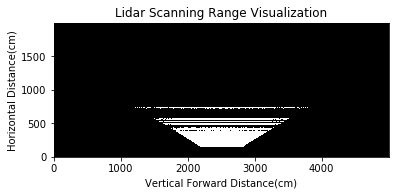

行间距离为（cm）： [19.96, 18.95, 18.02, 17.16, 16.36, 15.61, 14.92, 14.27, 13.66, 13.09, 12.55, 12.05, 11.58, 11.13, 10.71, 10.32, 9.94, 9.59, 9.25, 8.94, 8.63, 8.35, 8.08, 7.82, 7.57, 7.34, 7.11, 6.9, 6.69, 6.5, 6.31, 6.14, 5.96, 5.8, 5.64, 5.49, 5.35, 5.21, 5.08, 4.95, 4.83, 4.71, 4.59, 4.48, 4.38, 4.28, 4.18, 4.08, 3.99, 3.9, 3.82, 3.74, 3.66, 3.58, 3.5, 3.43, 3.36, 3.29, 3.23, 3.16, 3.1, 3.04, 2.98, 2.93, 2.87, 2.82, 2.77, 2.72, 2.67, 2.62, 2.58, 2.53, 2.49, 2.45, 2.4, 2.36, 2.32, 2.29, 2.25, 2.21, 2.18, 2.14, 2.11, 2.08, 2.05, 2.01, 1.98, 1.95, 1.93, 1.9, 1.87, 1.84, 1.82, 1.79, 1.77, 1.74, 1.72, 1.69, 1.67, 1.65, 1.63, 1.6, 1.58, 1.56, 1.54, 1.52, 1.5, 1.49, 1.47, 1.45, 1.43, 1.41, 1.4, 1.38, 1.36, 1.35, 1.33, 1.32, 1.3, 1.29, 1.27, 1.26, 1.24, 1.23]


行宽为(cm)： [2653.95, 2585.42, 2520.36, 2458.53, 2399.69, 2343.63, 2290.15, 2239.09, 2190.28, 2143.58, 2098.85, 2055.98, 2014.84, 1975.35, 1937.39, 1900.89, 1865.76, 1831.93, 1799.33, 1767.88, 1737.54, 1708.24, 1679.94, 1652.57, 1626.11, 160

In [34]:
plane_laser_range_horizontal(100.0, 20.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


最大检测距离为28647.86066771436厘米,最小距离为121.9125971672441厘米。
盲区宽度：61.9125971672441厘米


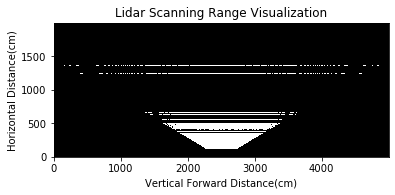

行间距离为（cm）： [19098.65, 3819.78, 1637.08, 909.51, 578.8, 400.73, 293.88, 224.75, 177.44, 143.66, 118.68, 99.7, 84.94, 73.23, 63.79, 56.07, 49.66, 44.3, 39.76, 35.89, 32.56, 29.67, 27.15, 24.94, 22.99, 21.26, 19.71, 18.33, 17.1, 15.98, 14.97, 14.05, 13.21, 12.45, 11.75, 11.11, 10.52, 9.98, 9.48, 9.01, 8.58, 8.18, 7.81, 7.46, 7.13, 6.83, 6.54, 6.28, 6.02, 5.79, 5.57, 5.36, 5.16, 4.97, 4.79, 4.63, 4.47, 4.32, 4.17, 4.04, 3.91, 3.79, 3.67, 3.56, 3.45, 3.35, 3.25, 3.16, 3.07, 2.98, 2.9, 2.82, 2.75, 2.67, 2.61, 2.54, 2.48, 2.41, 2.35, 2.3, 2.24, 2.19, 2.14, 2.09, 2.04, 2.0, 1.95, 1.91, 1.87, 1.83, 1.79, 1.75, 1.72, 1.68, 1.65, 1.61, 1.58, 1.55, 1.52, 1.49, 1.46, 1.44, 1.41, 1.38, 1.36, 1.33, 1.31, 1.29, 1.27, 1.24, 1.22]


行宽为(cm)： [99239.25, 33079.88, 19848.09, 14177.38, 11027.03, 9022.3, 7634.44, 6616.7, 5838.46, 5224.07, 4726.73, 4315.91, 3970.83, 3676.89, 3423.5, 3202.83, 3008.91, 2837.17, 2684.01, 2546.56, 2422.54, 2310.06, 2207.58, 2113.84, 2027.76, 1948.44, 1875.11, 1807.12, 1743.91, 16

In [28]:
plane_laser_range_horizontal(50.0)

In [63]:
def hv_distance(height, angle, distance):
    result = -1
    for v in range(125):
        v_angle = np.deg2rad(angle - 12.5 + 0.2 * v)
        if v_angle < 0:
            pass
        dist = height / np.tan(v_angle)
        if dist > distance:
            pass
        else:
            v_angle_prev = v_angle - np.deg2rad(0.2)
            dist_prev = height/np.tan(v_angle_prev)
            result = dist_prev - dist
            break
    print("在{}米处，光线横向间距为{}厘米.".format(distance/100.0, result))
    if angle - 12.5 > 0.0:
        print("无水平出射光，无竖直间距.")
    else:
        print("在{}米处，竖直间距为{}厘米.".format(distance/100.0, distance * np.tan(np.deg2rad(0.2))))
    print("\n")

In [64]:
hv_distance(100.0, 10.0, 1500.0)

在15.0米处，光线横向间距为169.8816758742446厘米.
在15.0米处，竖直间距为5.236009022394375厘米.




In [65]:
## height代表雷达安装的高度（单位厘米）， angle代表雷达水平中线的俯视角（角度制）
def plane_laser_range_horizontal2(height, angle = 20.0):
    mat = np.zeros((2000, 5000, 3))
    max_dist = 0
    min_dist = 30000.0
    dist = 0
    dist_prev = 0
    dist_list = []
    diff_list = []
    num_points = 0
    for v in range(125):
        v_angle = np.deg2rad(angle - 12.5 + 0.2 * v)
        if v_angle < 0.0:
            continue
        dist = height / np.tan(v_angle)
        hyp = height / np.sin(v_angle)
        if dist > max_dist:
            max_dist = dist
        if dist < min_dist:
            min_dist = dist
        y = round(dist)
        for h in range(600):
            if dist < 1000:
                num_points += 1
            h_angle = np.deg2rad(60 - 0.2 * h)
            x = 2500  + hyp * np.tan(h_angle) 
            if x >=0 and y >=0 and x <=4999 and y <=2999:
                cv2.circle(mat, (round(x),round(y)), 3, (155,155,155), -1)
        if dist_prev != 0:
            dist_list.append(round(dist_prev - dist, 2))
        dist_prev = dist
        diff_list.append(round(hyp * np.tan(np.pi/3) *2 , 2))
    #cutoff = round(height / (height - 60.0) * 80.0)
    #for x in range(2500):
        #cv2.circle(mat, (x, cutoff), 3, (255,0,0), -1)
    print("最大检测距离为{}厘米,最小距离为{}厘米。".format(max_dist, min_dist))
    #print("落在1000厘米以内范围的点共{}个，比例为{}%。".format(num_points, float(num_points)/750))
    print("盲区宽度：{}厘米".format(min_dist - 60.0))
    plt.title("Lidar Scanning Range Visualization")
    plt.xlabel("Vertical Forward Distance(cm)")
    plt.ylabel("Horizontal Distance(cm)")
    plt.ylim(0, 1999)
    plt.imshow(mat)
    plt.show()
    print("行间距离为（cm）：", dist_list)
    print("\n")
    print("行宽为(cm)：", diff_list)
    print("\n")
    hv_distance(height, angle, 500.0)
    hv_distance(height, angle, 1000.0)
    hv_distance(height, angle, 1500.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


最大检测距离为57295.72133542796厘米,最小距离为458.6414133306349厘米。
盲区宽度：398.6414133306349厘米


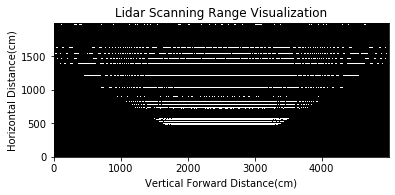

行间距离为（cm）： [38197.3, 7639.55, 3274.16, 1819.03, 1157.61, 801.46, 587.77, 449.5, 354.89, 287.31, 237.37, 199.41, 169.88, 146.47, 127.58, 112.13, 99.33, 88.6, 79.53, 71.78, 65.11, 59.34, 54.3, 49.87, 45.97, 42.51, 39.43, 36.67, 34.19, 31.96, 29.93, 28.1, 26.43, 24.9, 23.51, 22.23, 21.05, 19.96, 18.95, 18.02, 17.16, 16.36, 15.61, 14.92, 14.27, 13.66, 13.09, 12.55, 12.05, 11.58, 11.13, 10.71, 10.32, 9.94, 9.59, 9.25, 8.94, 8.63, 8.35, 8.08, 7.82]


行宽为(cm)： [198478.5, 66159.77, 39696.18, 28354.76, 22054.06, 18044.6, 15268.88, 13233.41, 11676.91, 10448.15, 9453.47, 8631.81, 7941.66, 7353.77, 6847.01, 6405.65, 6017.82, 5674.34, 5368.01, 5093.12, 4845.07, 4620.11, 4415.17, 4227.68, 4055.52, 3896.88, 3750.22, 3614.25, 3487.83, 3369.99, 3259.9, 3156.81, 3060.07, 2969.13, 2883.46, 2802.64, 2726.25, 2653.95, 2585.42, 2520.36, 2458.53, 2399.69, 2343.63, 2290.15, 2239.09, 2190.28, 2143.58, 2098.85, 2055.98, 2014.84, 1975.35, 1937.39, 1900.89, 1865.76, 1831.93, 1799.33, 1767.88, 1737.54, 1708.24, 16

In [14]:
plane_laser_range_horizontal2(100.0, 0.0)

In [34]:
def hv_distance(height, angle, distance):
    h1 = 0
    result = -1
    check = False
    for v in range(125):
        v_angle = np.deg2rad(angle + 12.5 - 0.2 * v)
        if v_angle < 0:
            pass
        dist = height / np.tan(v_angle)
        if dist < distance:
            check = True
            pass
        else:
            v_angle_next = v_angle - np.deg2rad(0.2)
            dist_next = height/np.tan(v_angle_next)
            h1 = (dist - distance) / dist * height
            h2 = (dist_next - distance) / dist_next * height
            result = h2 - h1
            break
    if check:
        print("物体底部可被激光覆盖")
        print("在{}米处，光线竖向间距为{}厘米.".format(distance/100.0, result))
    else:
        print("在{}米处，激光可及的最低点为{}厘米.".format(distance/100, h1))
        print("在{}米处，竖直间距为{}厘米.".format(distance/100.0, distance * np.tan(np.deg2rad(0.2))))
    if angle > 12.5:
        print("在{}米处，最高激光束高度为{}厘米.".format(distance/100.0, height - distance * np.tan(np.deg2rad(angle - 12.5))))
    print("\n")

In [35]:
## height代表雷达安装的高度（单位厘米）， angle代表雷达水平中线的俯视角（角度制）
def plane_laser_range_horizontal2(height, angle = 20.0):
    mat = np.zeros((2000, 5000, 3))
    max_dist = 0
    min_dist = 30000.0
    dist = 0
    dist_prev = 0
    dist_list = []
    diff_list = []
    num_points = 0
    for v in range(125):
        v_angle = np.deg2rad(angle - 12.5 + 0.2 * v)
        if v_angle < 0.0:
            continue
        dist = height / np.tan(v_angle)
        hyp = height / np.sin(v_angle)
        if dist > max_dist:
            max_dist = dist
        if dist < min_dist:
            min_dist = dist
        y = round(dist)
        for h in range(600):
            if dist < 1000:
                num_points += 1
            h_angle = np.deg2rad(60 - 0.2 * h)
            x = 2500  + hyp * np.tan(h_angle) 
            if x >=0 and y >=0 and x <=4999 and y <=2999:
                cv2.circle(mat, (round(x),round(y)), 3, (155,155,155), -1)
        if dist_prev != 0:
            dist_list.append(round(dist_prev - dist, 2))
        dist_prev = dist
        diff_list.append(round(hyp * np.tan(np.pi/3) *2 , 2))
    #cutoff = round(height / (height - 60.0) * 80.0)
    #for x in range(2500):
        #cv2.circle(mat, (x, cutoff), 3, (255,0,0), -1)
    print("最大检测距离为{}厘米,最小距离为{}厘米。".format(max_dist, min_dist))
    #print("落在1000厘米以内范围的点共{}个，比例为{}%。".format(num_points, float(num_points)/750))
    print("盲区宽度：{}厘米".format(min_dist - 60.0))
    plt.title("Lidar Scanning Range Vis
    plt.ylim(0, 1999)
    plt.imshow(mat)
    plt.show()
    print("行间距离为（cm）：", dist_list)
    print("\n")
    print("行宽为(cm)：", diff_list)
    print("\n")
    hv_distance(height, angle, 500.0)
    hv_distance(height, angle, 1000.0)
    hv_distance(height, angle, 1500.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


最大检测距离为160428.0197391997厘米,最小距离为898.9765012589984厘米。
盲区宽度：838.9765012589984厘米


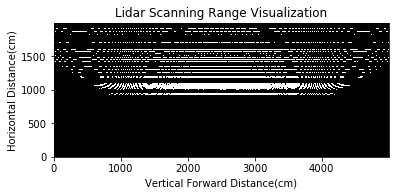

行间距离为（cm）： [106952.45, 21390.75, 9167.65, 5093.28, 3241.3, 2244.08, 1645.74, 1258.59, 993.69, 804.48, 664.62, 558.34, 475.67, 410.1, 357.23, 313.97, 278.12, 248.09, 222.68, 200.99, 182.32, 166.14, 152.03, 139.65, 128.72, 119.03, 110.4, 102.67, 95.73, 89.48, 83.82, 78.68, 74.0, 69.73, 65.82, 62.23, 58.93, 55.89, 53.07, 50.47, 48.05, 45.81, 43.72, 41.77, 39.94, 38.24, 36.64, 35.15, 33.74, 32.42, 31.17, 30.0, 28.89, 27.84, 26.85, 25.91, 25.02, 24.18, 23.37, 22.61, 21.89, 21.2, 20.54, 19.91, 19.32, 18.74, 18.2, 17.68, 17.18, 16.7, 16.24, 15.8, 15.38, 14.98, 14.59, 14.22, 13.86, 13.52, 13.18, 12.86, 12.56, 12.26, 11.98, 11.7, 11.43, 11.18]


行宽为(cm)： [555739.81, 185247.36, 111149.32, 79393.34, 61751.38, 50524.88, 42752.86, 37053.53, 32695.36, 29254.81, 26469.71, 24169.08, 22236.64, 20590.57, 19171.62, 17935.83, 16849.91, 15888.15, 15030.43, 14260.74, 13566.2, 12936.32, 12362.47, 11837.52, 11355.46, 10911.26, 10500.62, 10119.89, 9765.92, 9435.98, 9127.72, 8839.06, 8568.21, 8313.55, 8073.7, 7

In [42]:
plane_laser_range_horizontal2(280.0, 5.0)